# Routing

# http methods decrie 'intent', they express what of request..i.e. what to do with  data, and telling server what your intnestion is like geettiong data

# it expereeses where,,, 



i need to <intent:fetch> data from <where:x.com>

You're mixing the axes. Fix it like this:

**HTTP methods describe the *intent/action*.**
Examples:

* **GET** → fetch something
* **POST** → create something
* **PUT** → replace something
* **PATCH** → modify something
* **DELETE** → remove something

That's it. They tell the server **what you want to do**.

**The URL describes the *target/resource*.**
Examples:

* `/users/123`
* `/orders`
* `/products/5/images`

That tells the server **where** to apply the intent.

So the structure is:

**Intent (HTTP method) + Target (URL) + Optional body (data).**

Example:
“I need to **fetch** data from **x.com/users**.” =
`GET https://x.com/users`

Another example:
“I need to **create** a user at **x.com/users**.” =
`POST https://x.com/users {…json…}`

You don’t need to overthink it. HTTP method = verb. URL = noun.


# so routing is casicallly mapping url parameters to server side logic

Exactly. Routing is nothing magical.

**Routing = match an incoming URL + method → run the correct server logic.**

Example:
`GET /users/42` → call `getUserById(42)`
`POST /users` → call `createUser()`
`DELETE /users/42` → call `deleteUser(42)`

A router just extracts:

* the **path** (`/users/42`)
* the **parameters** (`42`)
* the **method** (GET/POST/…)

…and calls the correct handler function.

That's all it is.


![Screenshot 2025-12-11 at 7.55.39 PM.png](<attachment:Screenshot 2025-12-11 at 7.55.39 PM.png>)

Yes — **“books” is the resource**.
More precisely: **/api/books** represents a *collection resource*, and individual books like `/api/books/1` are *item resources*.

Breakdown:

---

## ✅ **Resource**

A resource = *the thing your API exposes*.

Here:

* **/api/books** → collection of book resources
* **/api/books/1** → a single book resource

---

## 🧠 Why “books” is the resource?

Resources in REST are **nouns**, not verbs.

Examples:

| URL                     | Resource                    |
| ----------------------- | --------------------------- |
| `/api/books`            | list of books               |
| `/api/books/1`          | book with id 1              |
| `/api/users/10/orders`  | orders belonging to user 10 |
| `/api/posts/5/comments` | comments of post 5          |

---

## 🧩 Methods describe “intent”

The HTTP method defines **what action** you want on that resource:

| Method              | Intent              |
| ------------------- | ------------------- |
| GET /api/books      | retrieve list       |
| POST /api/books     | create book         |
| GET /api/books/1    | fetch book          |
| PUT /api/books/1    | replace book        |
| PATCH /api/books/1  | update part of book |
| DELETE /api/books/1 | delete book         |

---

## Summary

You got it:

* **books = resource**
* **/api/books = resource endpoint**
* **HTTP method = action on that resource**

If you want, I can show you a clean mental model for REST in a 1-page cheat sheet.

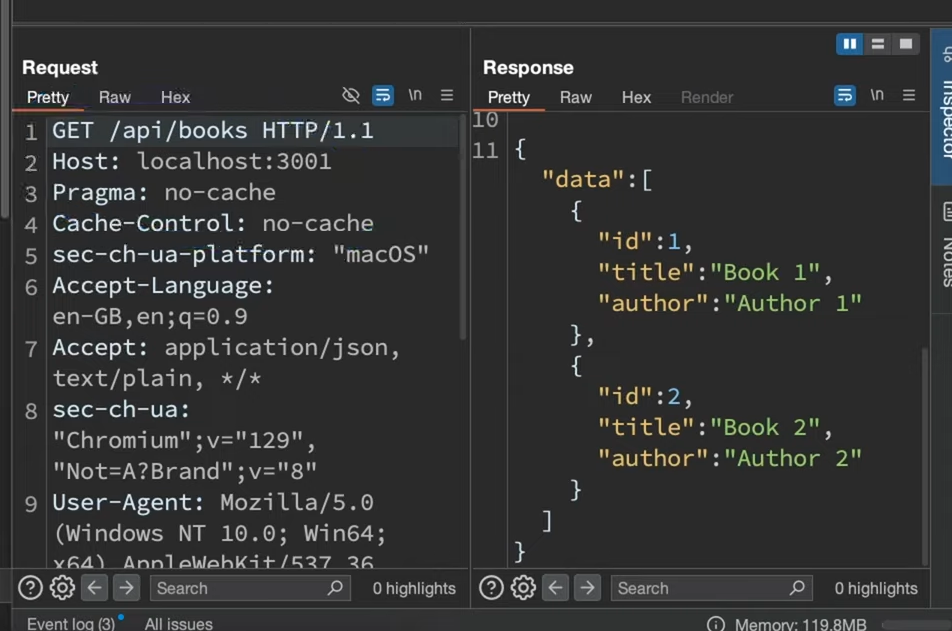

# Static vs dynamic routes is extremely simple — don’t overthink it.

---

# ✅ Static Route

A **static route** matches **exactly one fixed path**.
Nothing changes, no variables, no parameters.

### Examples

```
/api/books
/api/about
/api/health
```

### Characteristics

* Always the same URL
* Server doesn't extract anything from the path
* Maps directly to a specific handler
* Usually used for **collections** or **fixed endpoints**

---

# ✅ Dynamic Route

A **dynamic route** contains **variables** (path parameters).
You use it when the path depends on some value (id, slug, username, etc).

### Examples

```
/api/books/:id
/api/users/:userId/posts/:postId
/api/products/:sku
```

These routes match multiple possible URLs:

```
/api/books/1
/api/books/123
/api/books/999
```

### Characteristics

* Contains parameters
* Server extracts variables from the path
* Usually used for **individual items**

Example in Express:

```js
app.get('/api/books/:id', (req, res) => {
    console.log(req.params.id); // dynamic part
});
```

---

# 🧨 The Core Difference (Short & Direct)

| Static Route               | Dynamic Route                        |
| -------------------------- | ------------------------------------ |
| Matches **one fixed path** | Matches **a pattern**                |
| No parameters              | Has path parameters                  |
| `/api/books`               | `/api/books/:id`                     |
| Same behavior every time   | Behavior depends on extracted values |

---

If you want, I can also explain **query params vs dynamic params**, because people often mix those up too.


Here’s the **clean, direct distinction** — no fluff.

---

# ✅ 1. `/api/search?query=some value`

This uses **query parameters**.

### Key points:

* Goes **after `?`**
* Used for **filtering, searching, sorting, pagination**, etc.
* **Does NOT define the resource.**
* Resource is still:

  ```
  /api/search
  ```

### Server receives:

```js
req.query.query   // → "some value"
```

### Example use cases:

```
/api/products?category=clothes&limit=10
/api/users?sort=asc
/api/search?query=apple
```

---

# ✅ 2. `/api/books/1`

This uses a **route parameter (dynamic path)**.

### Key points:

* Part of the **path itself**
* Defines **which specific resource** you want
* Typically used for **IDs**, slugs, usernames

### Server receives:

```js
req.params.id   // → "1"
```

### Example use cases:

```
/api/books/1
/api/users/47
/api/posts/99/comments/12
```

---

# 🎯 The REAL Difference (Stop Mixing Them)

| Query Params (`?key=value`)   | Path Params (`:param`)        |
| ----------------------------- | ----------------------------- |
| Modify or filter a request    | Identify a specific resource  |
| Optional                      | Required (usually)            |
| Not part of resource identity | Part of the resource identity |
| `/api/search?query=x`         | `/api/books/1`                |

---

# 🧠 Quick rule to remember

* **If removing the value changes WHICH thing you’re fetching → path param**
  `/api/books/1` → removing `1` no longer identifies the same resource

* **If removing the value just changes HOW the server returns it → query param**
  `/api/search?query=hello` → removing query means “search nothing”, endpoint still valid

---

If you want, I can give you **5 examples and ask you to classify each**, to make sure you truly understand it.


# in post requst we have body, in get request in rest api we dont have bodies, 

technically you can do this  /api/search/some value. but it hard to mantiant and it defeats whole purpose of rest api, proiving semantic expersiiojn to api endpoints. vthats why we use query paramters

Your **intention is right**, but your explanation is sloppy. Here’s the precise, correct version you should say:

---

## ✅ Correct Explanation

In REST:

### **GET requests must not have a body**

Technically the HTTP spec allows it,
but **no browser, no proxy, no CDN, and no REST framework supports it reliably**.

So REST treats GET as:

* No body
* All parameters must be in the URL (path or query)

---

## Why `/api/search/some value` is a bad idea

Yes, you *could* put the search term in the path:

```
/api/search/some value
```

But it's **bad REST design** because:

1. **Path should identify a resource**, not an action or free-form text
2. Path segments are messy for search terms (spaces, symbols, encoding hell)
3. Query parameters are designed *exactly* for searches and filters
4. Maintaining multiple filters becomes impossible

   ```
   /api/search/value/sort/date/page/2   ← garbage
   ```
5. Harder to cache and reason about

---

## Why we use query parameters for search

Because they express **filters**, not resources:

```
/api/search?query=some value
```

That fits REST perfectly:

* Path = **what** you are accessing (`/api/search`)
* Query = **how** you want it (`query=some value`)

REST is based on semantics.
Using query params communicates the intention clearly:

> "Get the search resource, filtered by this query."

---

## Final clean version you should say

**In REST, GET requests don’t use bodies.
Search terms and filters go in query parameters because the path is meant to identify resources, while query params describe filtering or querying behavior.
Putting search text inside the path makes the API harder to maintain and breaks REST semantics.**

---

If you want, I can show you:

* 10 good REST endpoint examples
* 10 bad ones (and why they're bad)


# earch terms and filters go in query parameters because the path is meant to identify resources, while query params describe filtering or querying behavior.

# path is meant to identify resources
# query params descibe filterig or query behavior

Pagination = **splitting a large result set into smaller chunks**, so the client doesn’t fetch 10,000 items at once.

Here’s the clean, correct explanation you should give:

---

# ✅ Why We Need Pagination

Because:

* Large datasets overwhelm the server
* Response size becomes huge
* Slow UI
* Waste of bandwidth
* Expensive queries

So instead of returning **all** items, you return **one page at a time**.

---

# ✅ How Pagination Is Done in REST APIs

### **1. Query Parameters (Most common)**

```
GET /api/books?page=2&limit=20
```

* `page` → which page
* `limit` → how many items per page

---

### **2. Cursor-Based Pagination (for large/real-time data)**

Better for infinite scroll, high scale, or sorted data.

```
GET /api/books?cursor=af3e91&limit=20
```

Server returns:

```json
{
  "data": [...],
  "nextCursor": "af3e9c"
}
```

This avoids issues with:

* large offsets
* data changing while paginating

---

### **3. Offset-Based Pagination**

```
GET /api/books?offset=40&limit=20
```

Page 3 with limit 20 = offset 40.

Slower on very large tables but simple.

---

# ✅ Why Query Parameters (NOT Path) Are Used for Pagination

Because:

* Pagination isn’t a “resource” → it’s a **view** or **filter** over a resource
* Path should stay stable
* Pagination settings vary (page, limit, sort, filter, search)

Path:

```
/api/books      → resource
```

Query modifies the view:

```
/api/books?page=2&limit=20
```

---

# ✅ What You Should Say (clean version)

**Pagination splits large datasets into smaller chunks. In REST, it's done using query parameters like `page`, `limit`, `offset`, or `cursor`. The path identifies the resource, and the query parameters describe how the client wants the data (e.g., which page).**

---

If you want, I can also explain:

* cursor vs offset (with examples)
* which one to use in real projects
* how databases implement both internally


# **Nested routing = routes that represent a parent–child relationship between resources.**

![Screenshot 2025-12-12 at 4.35.32 PM.png](<attachment:Screenshot 2025-12-12 at 4.35.32 PM.png>)
It reflects the hierarchy of your data.

If one resource *belongs to* or *lives under* another, you express that relationship in the URL.

---

# ✅ What Nested Routing Looks Like

### **Example: Books → Chapters**

**Parent resource:**

```
/api/books
/api/books/10
```

**Child resource nested inside parent:**

```
/api/books/10/chapters
/api/books/10/chapters/3
```

This means:

* “Chapters of book 10”
* “Chapter 3 of book 10”

The route shows the hierarchy directly.

---

# 🔥 Why Use Nested Routes?

### **1. They express ownership / hierarchy clearly**

Chapter cannot exist without a book → so chapter lives inside book.

### **2. They prevent ambiguous paths**

If your API had both:

```
/api/chapters/3
```

Is it from Book 10? 11? 99?
Nested route removes confusion.

### **3. They make filtering implicit**

You don’t need:

```
/api/chapters?bookId=10
```

Nested already implies the filter:

```
/api/books/10/chapters
```

---

# 🧠 When to Use Nested Routing

Use it when:

* child resource **only makes sense** in the context of a parent
* there is a **strong parent-child relationship**
* child **cannot exist independently**

Examples:

* `/users/42/orders`
* `/orders/10/items`
* `/projects/3/tasks`
* `/courses/12/students`

---

# ❌ When NOT to Use Nested Routing

Don’t nest when:

* the child can exist independently
* you risk going too deep (never nest more than 2 levels)

Bad example:

```
/api/companies/1/departments/2/employees/5/salaries/4/details
```

This becomes a mess.

Limit nesting to **one level deep**:

```
/api/departments/2/employees/5
```

Not:

```
/api/companies/1/departments/2/employees/5
```

---

# 🌟 Clean Summary (this is the one-liner you should memorize)

**Nested routing maps hierarchical relationships directly into the URL so child resources sit under parent resources in the path (e.g., `/books/10/chapters/3`).**

---

If you want, I can give you:

* nested routing examples in Express.js
* nested routing examples in Next.js
* how REST frameworks actually parse nested params (req.params)

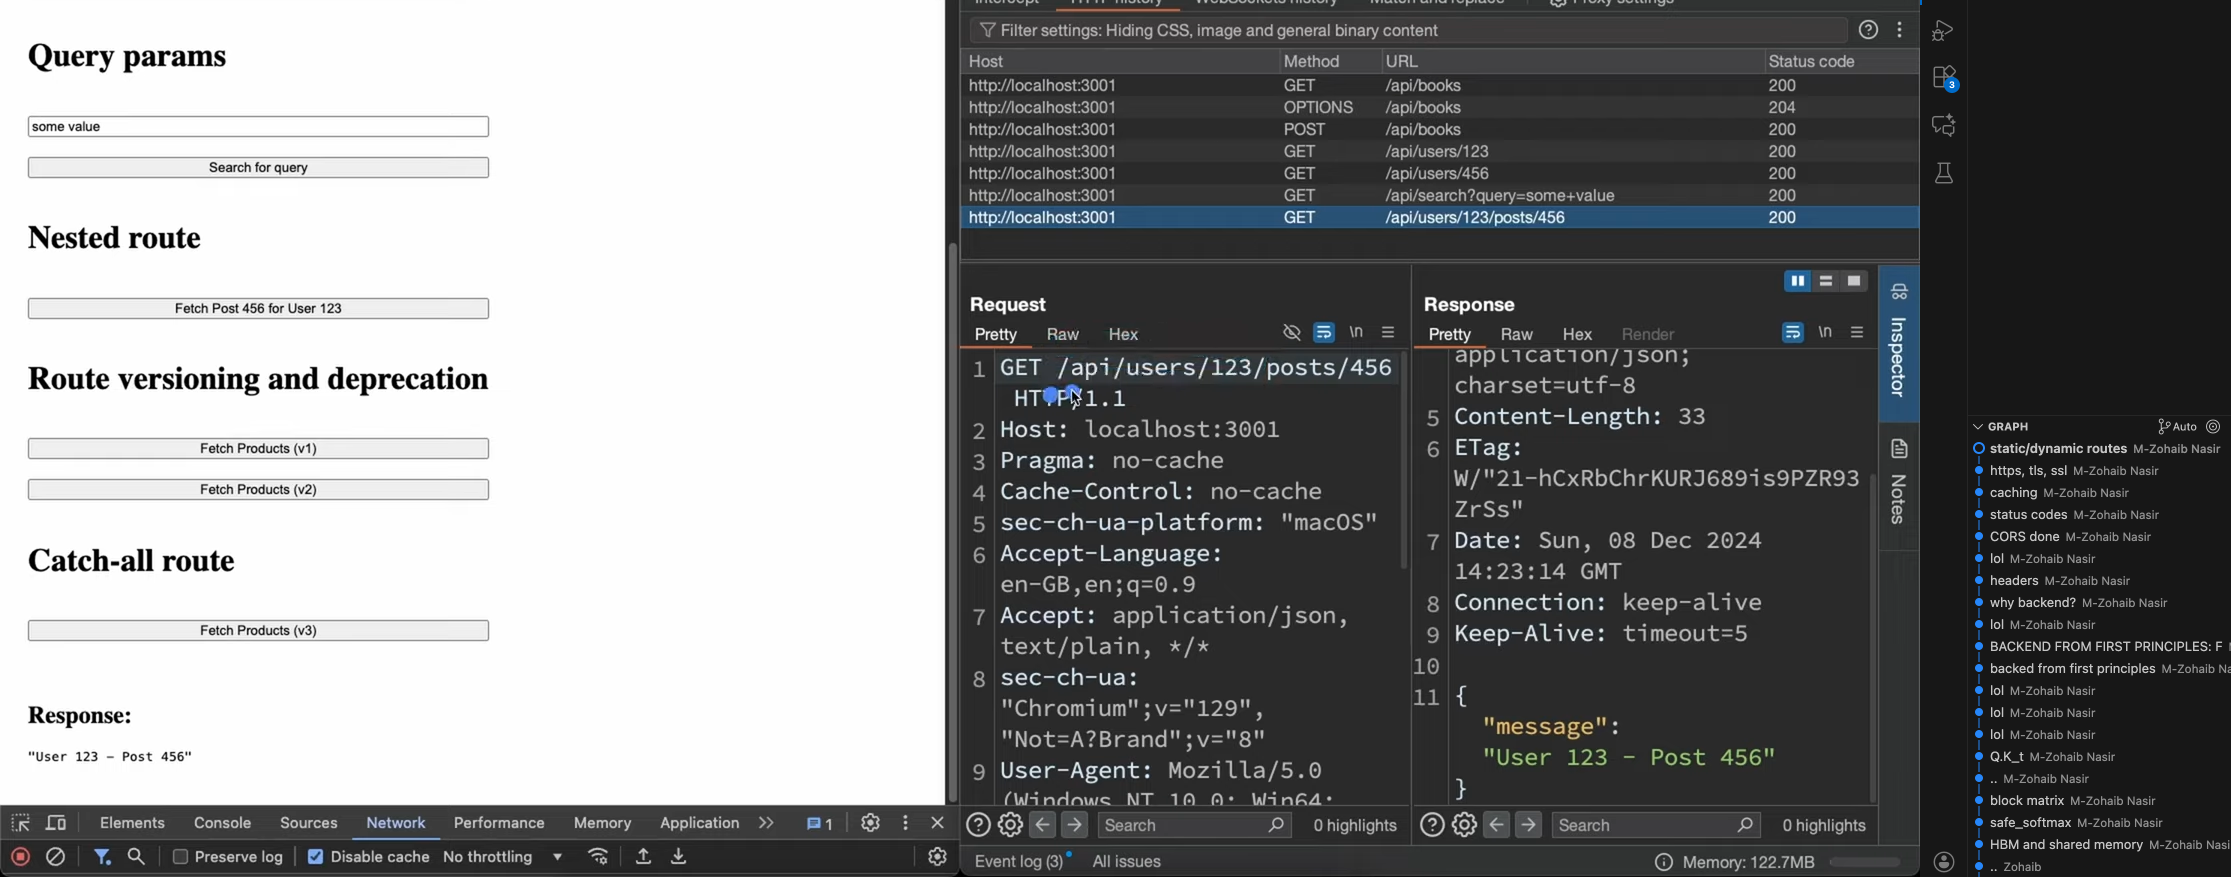

You’re clearly trying to understand **what that screenshot shows** and **how nested routing works in practice**.
I’ll break it down directly.

---

# ✔️ What’s happening in your screenshot

The highlighted request is:

```
GET /api/users/123/posts/456
```

This is a **nested route** with **two dynamic params**:

* `userId = 123`
* `postId = 456`

Your server returned:

```json
{
  "message": "User 123 – Post 456"
}
```

This proves your backend correctly extracted both parameters.

---

# ✔️ What the UI buttons represent

### **1. Query params**

You triggered something like:

```
GET /api/search?query=some+value
```

Simple query param demonstration.

---

### **2. Nested route**

Button sends:

```
GET /api/users/123/posts/456
```

This is showing hierarchical routing:

* A **user** has **posts**
* So request path expresses that relationship

---

### **3. Route versioning & deprecation**

Buttons for:

```
/api/products (v1)
/api/products (v2)
```

You’re comparing v1 vs v2 endpoints.

---

### **4. Catch-all route**

Probably something like:

```
/api/products/*
```

Shows how your server handles any “remaining” route that matches.

---

# ✔️ Backend interpretation (what your server is doing)

In Express.js, it would look like:

```js
app.get('/api/users/:userId/posts/:postId', (req, res) => {
  const { userId, postId } = req.params;
  res.json({ message: `User ${userId} - Post ${postId}` });
});
```

Your screenshot matches exactly this flow.

---

# ✔️ The important part (the mental model)

The URL:

```
/api/users/123/posts/456
```

is literally expressing the hierarchy:

* **users** → parent
* **123** → specific user
* **posts** → child collection
* **456** → specific post inside that user

This is nested routing in the simplest possible form.

---

If you want, I can also explain:

* when NOT to use nested routing
* how Next.js handles it (`[userId]/posts/[postId]/route.js`)
* how to add validation (e.g., user must own post)

Just say the word.


Good. Let me break down `/users/123/posts/456` from first principles, since you're learning this.

## What This URL Structure Represents

**It's expressing a hierarchy:**

```
users (collection)
  └─ 123 (specific user)
      └─ posts (that user's posts collection)
          └─ 456 (specific post)
```

## Breaking Down Each Segment

**1. `/users`**
- This is a **resource collection**
- Like a database table name
- Represents "all users" conceptually

**2. `/123`**
- This is a **route parameter** (dynamic segment)
- Identifies a specific user by ID
- In Express: `:userId`
- Extracted as `req.params.userId = "123"`

**3. `/posts`**
- This is a **nested collection**
- Represents "all posts that belong to user 123"
- Shows parent-child relationship

**4. `/456`**
- Another **route parameter**
- Identifies a specific post within that user's posts
- In Express: `:postId`
- Extracted as `req.params.postId = "456"`

## What This Maps To

**Backend code (Express):**
```javascript
app.get('/users/:userId/posts/:postId', (req, res) => {
  const userId = req.params.userId;    // "123"
  const postId = req.params.postId;    // "456"
  
  // Query database
  // Return post 456 that belongs to user 123
});
```

**Database query:**
```sql
SELECT * FROM posts 
WHERE user_id = 123 AND post_id = 456;
```

**REST interpretation:**
"Get the specific post (456) owned by user (123)"

## Why This Structure Exists

**1. Expresses ownership**
- Post 456 doesn't exist in isolation
- It belongs to user 123
- URL structure shows this relationship

**2. Implicit filtering**
- You don't need: `/posts/456?userId=123`
- The path already encodes the filter

**3. Semantic clarity**
- Looking at the URL, you immediately understand:
  - What resource (post)
  - Which user owns it (123)
  - Which specific post (456)

## When You'd Use Different HTTP Methods

**On the same route:**

```
GET    /users/123/posts/456  → Fetch post 456
PUT    /users/123/posts/456  → Replace entire post 456
PATCH  /users/123/posts/456  → Update parts of post 456
DELETE /users/123/posts/456  → Delete post 456
```

**On the parent collection:**

```
GET  /users/123/posts  → Get all posts by user 123
POST /users/123/posts  → Create new post for user 123
```

## Common Mistake You Must Avoid

**❌ Don't nest too deep:**
```
/companies/1/departments/2/teams/3/employees/4/tasks/5
```
This becomes unmaintainable.

**✅ Stop at 1-2 levels:**
```
/users/123/posts/456           ← Good
/departments/2/employees/4      ← Good
```

If you need more context, use query params:
```
/tasks/5?employeeId=4&teamId=3
```

## The Core Logic

**Path params = identity of resources**
- Who (user 123)
- What (post 456)

**Query params = how you want the data**
- Filtering
- Sorting
- Pagination

## Real-World Example

**Twitter-like API:**
```
/users/zohaib/tweets/987654
```
Means: "Get tweet 987654 that belongs to user zohaib"

**Backend validates:**
1. Does user "zohaib" exist?
2. Does tweet 987654 exist?
3. Does tweet 987654 actually belong to zohaib?
4. If yes → return it
5. If no → 404 or 403

## Summary (One Sentence)

`/users/123/posts/456` is a nested REST route that identifies a specific child resource (post 456) within the context of its parent resource (user 123).

Now tell me: what would `/users/123/posts` return? And how would you create a new post for user 123?

# query parmeter vs path paramter

# Query Parameters vs Path Parameters

## Path Parameters (Route Params)

**What they are:**
Part of the URL path itself that identifies a **specific resource**.

**Syntax:**
```
/users/:userId/posts/:postId
/users/123/posts/456
       ^^^        ^^^
    path params
```

**Extracted as:**
```javascript
req.params.userId  // "123"
req.params.postId  // "456"
```

**Purpose:**
Identify **WHICH** resource you want.

**Characteristics:**
- **Required** (without them, route doesn't match)
- Part of resource identity
- Defines the resource itself
- Hierarchical

**Examples:**
```
/users/123              → Get user with ID 123
/products/abc-xyz       → Get product with slug "abc-xyz"
/posts/456/comments/789 → Get comment 789 of post 456
```

---

## Query Parameters (Query Params)

**What they are:**
Key-value pairs after `?` that **modify or filter** the request.

**Syntax:**
```
/users?role=admin&status=active
       ^^^^^^^^^^^^^^^^^^^^^^^^^
          query params
```

**Extracted as:**
```javascript
req.query.role    // "admin"
req.query.status  // "active"
```

**Purpose:**
Define **HOW** you want the resource (filtering, sorting, pagination).

**Characteristics:**
- **Optional** (route works without them)
- Not part of resource identity
- Modify the view/result
- Flat structure (no hierarchy)

**Examples:**
```
/users?page=2&limit=20          → Pagination
/products?category=electronics   → Filtering
/posts?sort=date&order=desc      → Sorting
/search?q=hello&lang=en          → Search + options
```

---

## The Core Difference

| Aspect | Path Parameters | Query Parameters |
|--------|----------------|------------------|
| **Identity** | Part of resource identity | Not part of identity |
| **Required?** | Usually yes | Usually optional |
| **Purpose** | Identify WHICH resource | Modify HOW you get it |
| **Structure** | Hierarchical | Flat key-value |
| **Example** | `/users/123` | `/users?role=admin` |
| **Removal** | Breaks the route | Request still valid |

---

## Decision Rule (Critical)

**Ask yourself: "If I remove this value, does the resource identity change?"**

**YES → Path parameter**
```
/books/123  → removing "123" = no longer the same book
/users/zohaib → removing "zohaib" = different user
```

**NO → Query parameter**
```
/books?sort=title → removing "sort" = same books, different order
/users?page=2 → removing "page" = same users, different subset
```

---

## Real Examples to Lock This In

### Example 1: E-commerce
```javascript
// Path param: WHICH product
GET /products/iphone-15

// Query params: HOW you want it displayed
GET /products/iphone-15?color=blue&storage=256gb
```

### Example 2: Blog
```javascript
// Path param: WHICH post
GET /posts/456

// Query params: HOW you view it
GET /posts/456?format=pdf&includeComments=true
```

### Example 3: Users
```javascript
// Path param: WHICH user
GET /users/123

// Query params: Filter all users
GET /users?country=Pakistan&verified=true
```

---

## When Both Are Used Together

```javascript
GET /users/123/posts?status=published&limit=10
     ^^^^^^^^           ^^^^^^^^^^^^^^^^^^^^^^^
   path params              query params
```

Meaning:
- **Path:** Get posts of user 123
- **Query:** Only published ones, max 10 results

---

## Common Mistakes

**❌ Wrong: Using query params for identity**
```
/posts?id=456
```
Bad because:
- Identity should be in path
- Harder to cache
- Breaks REST conventions

**✅ Correct:**
```
/posts/456
```

---

**❌ Wrong: Using path params for filtering**
```
/users/role/admin/status/active
```
Bad because:
- Not identifying a specific resource
- Unnecessarily nested
- Hard to maintain

**✅ Correct:**
```
/users?role=admin&status=active
```

---

## Technical Behavior

**Path params:**
- Matched by router first
- Define which handler runs
- Must match route pattern exactly

**Query params:**
- Parsed after route matching
- Don't affect routing
- Can be in any order
- Can be missing

---

## Backend Handling (Express)

```javascript
// Path params
app.get('/users/:userId/posts/:postId', (req, res) => {
  req.params.userId   // from path
  req.params.postId   // from path
});

// Query params
app.get('/users', (req, res) => {
  req.query.role      // from query
  req.query.status    // from query
  req.query.page      // from query
});

// Both together
app.get('/users/:userId/posts', (req, res) => {
  req.params.userId       // path
  req.query.status        // query
  req.query.limit         // query
});
```

---

## One-Sentence Summary

**Path parameters identify WHICH specific resource you want; query parameters describe HOW you want to filter, sort, or modify the result.**

---

Now answer this:

Which is correct for "Get all products in category 'electronics' sorted by price"?

A) `/products/electronics/sort/price`  
B) `/products?category=electronics&sort=price`  
C) `/categories/electronics/products?sort=price`

Pick one and explain why the others are wrong.

# route versioning and deprecation


![Screenshot 2025-12-12 at 5.48.35 PM.png](<attachment:Screenshot 2025-12-12 at 5.48.35 PM.png>)

![Screenshot 2025-12-12 at 5.49.35 PM.png](<attachment:Screenshot 2025-12-12 at 5.49.35 PM.png>)
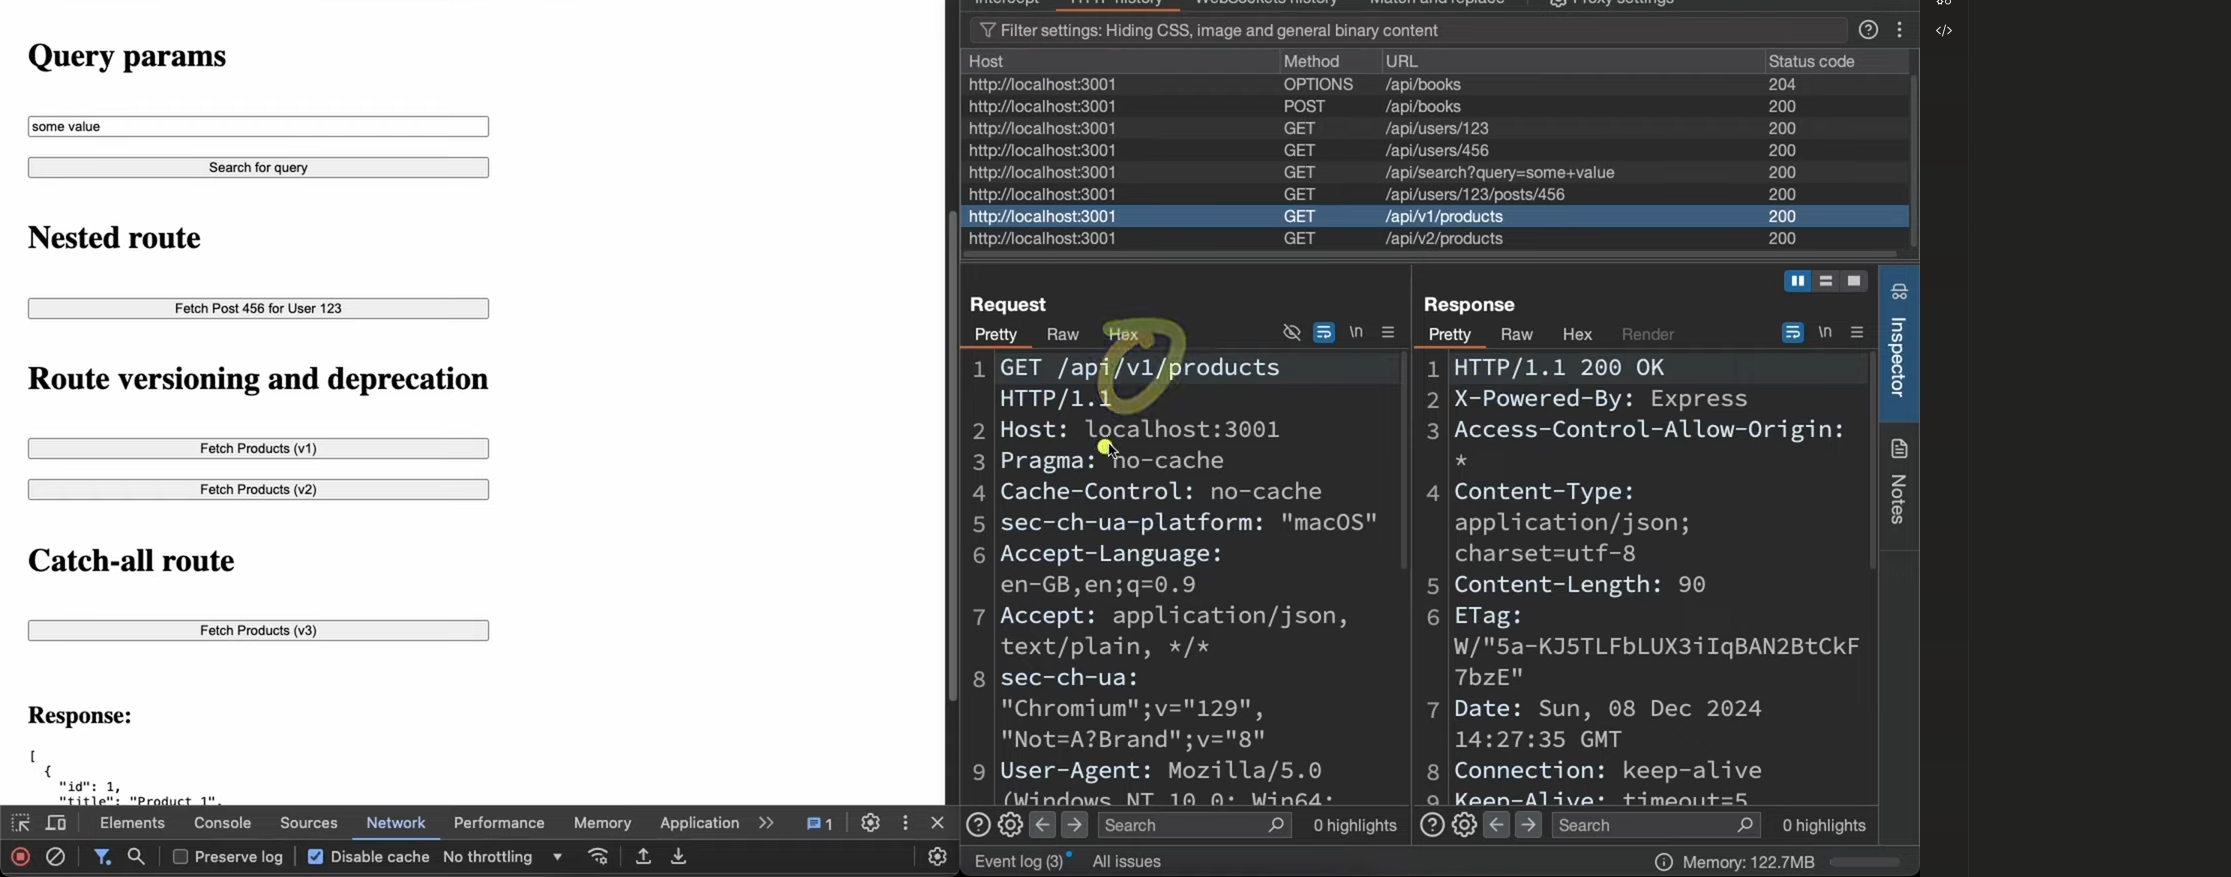
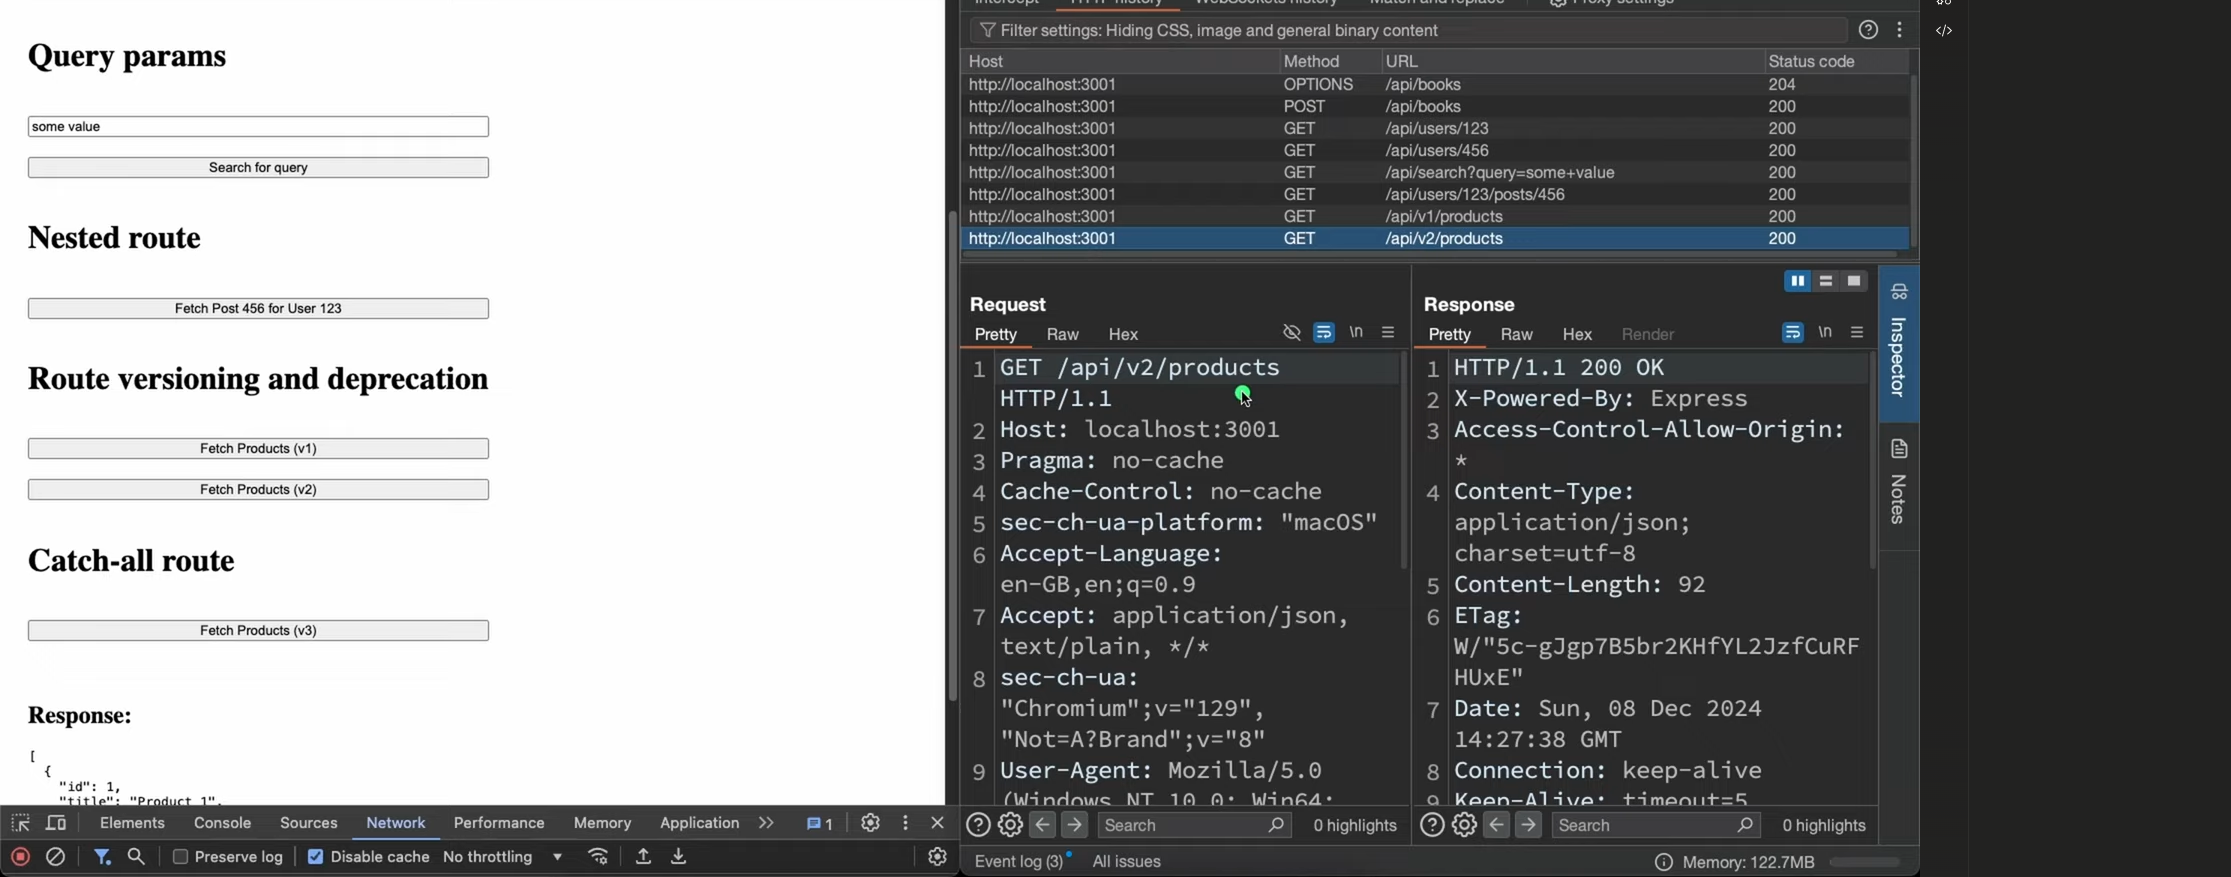

# Route Versioning and Deprecation

## Why Versioning Exists

Your API will change over time. You'll need to:
- Add new fields
- Remove old fields
- Change response structure
- Change validation rules
- Fix design mistakes

**Without versioning:** Breaking every client immediately.

**With versioning:** Old clients keep working while new clients get improvements.

---

## Common Versioning Strategies

### 1. URL Path Versioning (Most Common)

**Structure:**
```
/v1/users
/v2/users
/v3/users
```

**Example:**
```javascript
// Version 1
GET /api/v1/products
Response: { "id": 1, "name": "iPhone" }

// Version 2 (added new field)
GET /api/v2/products
Response: { "id": 1, "name": "iPhone", "category": "electronics" }
```

**Pros:**
- ✅ Extremely clear
- ✅ Easy to route
- ✅ Easy to cache (different URLs)
- ✅ Easy to deprecate (just remove /v1 routes)

**Cons:**
- ❌ URL changes
- ❌ Need to maintain multiple codebases

**When to use:** Most REST APIs (Stripe, Twitter, GitHub)

---

### 2. Header Versioning

**Structure:**
```
GET /api/users
Accept: application/vnd.myapi.v1+json

GET /api/users
Accept: application/vnd.myapi.v2+json
```

**Pros:**
- ✅ URL stays same
- ✅ Cleaner URLs

**Cons:**
- ❌ Harder to test (can't just paste URL in browser)
- ❌ Harder to cache
- ❌ More complex routing

**When to use:** Internal APIs, microservices

---

### 3. Query Parameter Versioning

**Structure:**
```
GET /api/users?version=1
GET /api/users?version=2
```

**Pros:**
- ✅ Simple

**Cons:**
- ❌ Mixing versioning with filtering
- ❌ Ugly
- ❌ Not RESTful

**When to use:** Never. Don't do this.

---

## Backend Implementation (Express)

### Method 1: Separate Route Files

```javascript
// routes/v1/users.js
router.get('/users', (req, res) => {
  res.json({ version: 1, data: [...] });
});

// routes/v2/users.js
router.get('/users', (req, res) => {
  res.json({ version: 2, data: [...], newField: true });
});

// app.js
app.use('/api/v1', require('./routes/v1'));
app.use('/api/v2', require('./routes/v2'));
```

### Method 2: Version-Specific Logic

```javascript
app.get('/api/:version/users', (req, res) => {
  const version = req.params.version;
  
  if (version === 'v1') {
    // Old logic
    res.json({ id: 1, name: "John" });
  } else if (version === 'v2') {
    // New logic
    res.json({ id: 1, fullName: "John Doe", email: "..." });
  } else {
    res.status(400).json({ error: "Invalid version" });
  }
});
```

---

## Deprecation Process

**Deprecation = announcing that a version will be removed in the future.**

### Step-by-Step Deprecation

**1. Announce the deprecation**
```javascript
// In v1 response headers
app.get('/api/v1/users', (req, res) => {
  res.set('Deprecation', 'true');
  res.set('Sunset', 'Sat, 31 Dec 2025 23:59:59 GMT');
  res.set('Link', '</api/v2/users>; rel="successor-version"');
  
  res.json({ ... });
});
```

**2. Log usage**
```javascript
app.use('/api/v1/*', (req, res, next) => {
  console.warn(`[DEPRECATED] v1 API called: ${req.path}`);
  // Send to analytics/monitoring
  next();
});
```

**3. Add warning in response**
```javascript
{
  "warning": "This API version is deprecated. Migrate to v2 by Dec 31, 2025",
  "data": { ... }
}
```

**4. Gradually reduce rate limits**
```javascript
// v1: 100 requests/hour
// v2: 1000 requests/hour
```

**5. Finally remove it**
```javascript
app.use('/api/v1/*', (req, res) => {
  res.status(410).json({ 
    error: "This API version has been removed. Use /api/v2" 
  });
});
```

---

## Real-World Example: Breaking Change

**Scenario:** You need to rename field `name` → `fullName`

### Without Versioning (❌ BAD)
```javascript
// Day 1
GET /api/users/1
{ "name": "John" }

// Day 2 (YOU BREAK EVERYONE)
GET /api/users/1
{ "fullName": "John" }  // All old apps crash
```

### With Versioning (✅ GOOD)
```javascript
// v1 (keep working)
GET /api/v1/users/1
{ "name": "John" }

// v2 (new apps use this)
GET /api/v2/users/1
{ "fullName": "John" }

// Both work simultaneously
// Deprecate v1 after 6 months
// Remove v1 after 12 months
```

---

## Version Migration Strategy

### Timeline Example

**Month 0:** Release v2
```
- v1: Active
- v2: Released
- Announcement: "v1 will be deprecated in 6 months"
```

**Month 6:** Deprecate v1
```
- v1: Deprecated (still works, but warns)
- v2: Recommended
- Warning headers added to v1
- Rate limits reduced on v1
```

**Month 12:** Remove v1
```
- v1: Returns 410 Gone
- v2: Only supported version
```

---

## How to Communicate Deprecation

**1. Response Headers**
```http
Deprecation: true
Sunset: Sat, 31 Dec 2025 23:59:59 GMT
Link: </api/v2/users>; rel="successor-version"
```

**2. Response Body Warning**
```json
{
  "warning": {
    "message": "API v1 is deprecated",
    "sunsetDate": "2025-12-31",
    "migrationGuide": "https://docs.example.com/v2-migration"
  },
  "data": { ... }
}
```

**3. Documentation**
```
⚠️ Deprecated: This endpoint will be removed on Dec 31, 2025
👉 Use /api/v2/users instead
📖 Migration guide: https://...
```

**4. Email to API users**
- 6 months notice
- 3 months notice
- 1 month notice
- 1 week notice

---

## Common Versioning Mistakes

### ❌ Mistake 1: Too many versions
```
/v1/users
/v2/users
/v3/users
/v4/users
/v5/users  ← This is chaos
```

**Fix:** Maintain max 2 versions at once (current + previous)

---

### ❌ Mistake 2: Breaking changes in same version
```javascript
// v1 on Monday
{ "name": "John" }

// v1 on Tuesday (BREAKING!)
{ "fullName": "John" }
```

**Fix:** Never change existing versions. Create v2.

---

### ❌ Mistake 3: No deprecation period
```
Today: v1 works
Tomorrow: v1 returns 404
```

**Fix:** Always give 6-12 months warning

---

### ❌ Mistake 4: Implicit versioning
```javascript
// No version in URL
GET /api/users

// How does client know what structure to expect?
```

**Fix:** Always explicit version

---

## Status Codes for Versioning

```
200 OK              → Normal response
301 Moved Permanently → Redirect v1 → v2 (if structure same)
410 Gone            → Version removed
400 Bad Request     → Invalid version specified
```

---

## Real API Examples

### Stripe
```
/v1/customers
/v2/customers
```
- Explicit path versioning
- Long deprecation cycles
- Very stable

### Twitter (X)
```
/1.1/statuses/user_timeline
/2/tweets
```
- Major version changes
- Different endpoint names

### GitHub
```
Accept: application/vnd.github.v3+json
```
- Header versioning
- v3 stable for years

---

## Quick Decision Tree

**When should you create a new version?**

```
Does the change break existing clients?
├─ NO → Just update current version
└─ YES → Create new version
    ├─ Is it a small fix?
    │   └─ Consider PATCH version (v1.1, v1.2)
    └─ Is it a major redesign?
        └─ Create new MAJOR version (v2, v3)
```

---

## One-Sentence Summary

**Route versioning allows you to maintain multiple API versions simultaneously so existing clients continue working while new clients adopt breaking changes, with a planned deprecation timeline before removing old versions.**

---

Now answer this:

Your API currently returns:
```json
{ "user_id": 123, "user_name": "John" }
```

You want to change it to:
```json
{ "id": 123, "name": "John" }
```

What do you do?

A) Just change it (it's the same data)  
B) Create v2 with new structure, keep v1 for 6 months  
C) Add both formats in v1 for backward compatibility  

Pick one and explain why.

Looking at your screenshot, I can see you're testing route versioning in practice. Let me explain what's happening:

## What Your Screenshot Shows

**Network tab showing:**
```
GET /api/v1/products  → 200 OK
GET /api/v2/products  → 200 OK
```

**Request details for v1:**
```
GET /api/v1/products HTTP/1.1
Host: localhost:3001
```

**Response headers include:**
```
ETag: W/"5a-KJ5TLFbLUX3iIqBAN2BtCkF7bzE"
Date: Sun, 08 Dec 2024 14:27:35 GMT
Connection: keep-alive
```

---

## What This Proves

**1. You have two versions running simultaneously**
```
/api/v1/products  ← Version 1
/api/v2/products  ← Version 2
```

Both return `200 OK`, meaning both versions are active and working.

**2. Path versioning strategy**
You're using URL path versioning (the most common approach).

**3. Same endpoint, different versions**
The route `/products` exists in both v1 and v2, but they can return different data structures.

---

## What's Likely Happening in Your Backend

**Express routing:**
```javascript
// v1 routes
app.get('/api/v1/products', (req, res) => {
  res.json({
    version: 1,
    products: [
      { product_id: 1, product_name: "iPhone" }
    ]
  });
});

// v2 routes
app.get('/api/v2/products', (req, res) => {
  res.json({
    version: 2,
    products: [
      { id: 1, name: "iPhone", category: "electronics" }
    ]
  });
});
```

---

## Important Headers in Your Response

**1. ETag**
```
ETag: W/"5a-KJ5TLFbLUX3iIqBAN2BtCkF7bzE"
```
- `W/` means "weak" ETag (content semantically equivalent but bytes might differ)
- Used for caching validation
- Each version can have different ETags even for "same" data

**2. Connection: keep-alive**
```
Connection: keep-alive
```
- HTTP/1.1 persistent connection
- Same TCP socket used for multiple requests
- That's why you can hit v1 and v2 rapidly without reconnection overhead

**3. Cache-Control: no-cache**
```
Pragma: no-cache
Cache-Control: no-cache
```
- Your server is telling browser: "Don't cache this response"
- Must revalidate on every request
- Good for development, bad for production

---

## What You're Testing

Based on your UI buttons on the left:

**1. Query params** → `/api/search?query=some+value`

**2. Nested route** → `/api/users/123/posts/456`

**3. Route versioning** → `/api/v1/products` vs `/api/v2/products`

**4. Catch-all route** → `/api/products/*` (matches anything under /products)

---

## Real Versioning Scenario

**What v1 might return:**
```json
{
  "products": [
    {
      "product_id": 1,
      "product_name": "iPhone 15",
      "price": 999
    }
  ]
}
```

**What v2 might return (breaking changes):**
```json
{
  "products": [
    {
      "id": 1,
      "name": "iPhone 15",
      "pricing": {
        "amount": 999,
        "currency": "USD"
      },
      "category": "electronics"
    }
  ]
}
```

Notice:
- `product_id` → `id`
- `product_name` → `name`
- `price` → `pricing` object (breaking change)
- Added `category` field

Without versioning, changing v1 structure would break every existing client.

---

## Missing from Your Response (For Production)

Your response should include deprecation headers if v1 is being phased out:

```http
HTTP/1.1 200 OK
Deprecation: true
Sunset: Sat, 31 Dec 2025 23:59:59 GMT
Link: </api/v2/products>; rel="successor-version"
Warning: 299 - "API v1 is deprecated. Migrate to v2 by Dec 31, 2025"
```

---

## The Catch-All Route You Have

Looking at your UI button "Fetch Products (v1)" suggests you also implemented:

```javascript
// Catch-all for v1
app.get('/api/v1/*', (req, res) => {
  console.log(`v1 route accessed: ${req.path}`);
  // Handle or forward to specific routes
});
```

This catches any route under `/api/v1/` that doesn't have a specific handler.

---

## Testing Checklist (What You Should Verify)

**1. Both versions return different structures?**
```bash
curl localhost:3001/api/v1/products
curl localhost:3001/api/v2/products
# Should show different JSON structures
```

**2. Invalid version returns error?**
```bash
curl localhost:3001/api/v99/products
# Should return 400 or 404
```

**3. Deprecation headers on v1?**
```bash
curl -I localhost:3001/api/v1/products
# Should show Deprecation header
```

**4. Both versions cached separately?**
```bash
# ETags should differ between v1 and v2
```

---

## What Your Code Probably Looks Like

```javascript
const express = require('express');
const app = express();

// V1 Routes
app.get('/api/v1/products', (req, res) => {
  res.set('Deprecation', 'true');
  res.set('Sunset', 'Sat, 31 Dec 2025 23:59:59 GMT');
  
  res.json({
    products: [
      { product_id: 1, product_name: "Item" }
    ]
  });
});

// V2 Routes
app.get('/api/v2/products', (req, res) => {
  res.json({
    products: [
      { id: 1, name: "Item", category: "..." }
    ]
  });
});

// Catch-all for unknown versions
app.get('/api/:version/products', (req, res) => {
  const { version } = req.params;
  if (!['v1', 'v2'].includes(version)) {
    return res.status(400).json({ 
      error: `Invalid API version: ${version}` 
    });
  }
});

app.listen(3001);
```

---

## One Critical Thing You Should Add

**Log v1 usage for deprecation tracking:**

```javascript
app.use('/api/v1/*', (req, res, next) => {
  console.warn(`⚠️ DEPRECATED: ${req.method} ${req.path}`);
  
  // Track in analytics
  analytics.track('deprecated_api_usage', {
    version: 'v1',
    endpoint: req.path,
    ip: req.ip,
    timestamp: new Date()
  });
  
  next();
});
```

This tells you:
- Who is still using v1
- Which endpoints are most used
- When you can safely remove v1

---

## Summary

Your screenshot shows **working path-based versioning** where:
- v1 and v2 coexist
- Same endpoint `/products` works under both versions
- Server returns 200 for both
- ETag caching works per version
- Connection kept alive for efficiency

The key missing piece for production: **deprecation headers on v1 responses**.

Now tell me: In your backend code, how are you handling the v1 vs v2 routing? Separate route files or version check inside the handler?